# Задание 8. Поиск типичных подпоследовательностей с помощью матричного профиля ряда
Выполнил студент группы КЭ-, 

### Установка и импорт модулей

In [ ]:
import sys
!{sys.executable} -m pip install matrixprofile

In [1]:
import numpy as np
import matrixprofile as mp
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal

### Набор данных PAMAP

TODO: сослаться на переведенныый readme файл

## Задание 1. Поиск сниппетов одномерного временного ряда
TODO: переформулировать задание
1. Разработайте программу, которая выполняет поиск top-_kk_ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder. Параметрами программы являются ряд, длина подпоследовательности (сниппета) и число _kk_.
2. Проведите эксперименты на трех временных рядах из различных предметных областей и пяти различных длин сниппета (взяв _kk_ = 5).
3. Выполните визуализацию результатов экспериментов в следующем виде: отображение временного ряда, в котором сниппеты показаны различными цветами, и в легенде указана значимость каждого сниппета.
4. Проанализируйте и изложите содержательный смысл полученных результатов.

### Методические указания

TODO: Добавить описание

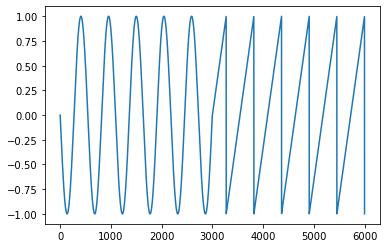

In [2]:
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [3]:
snp = snippets(ts, 600, 2)

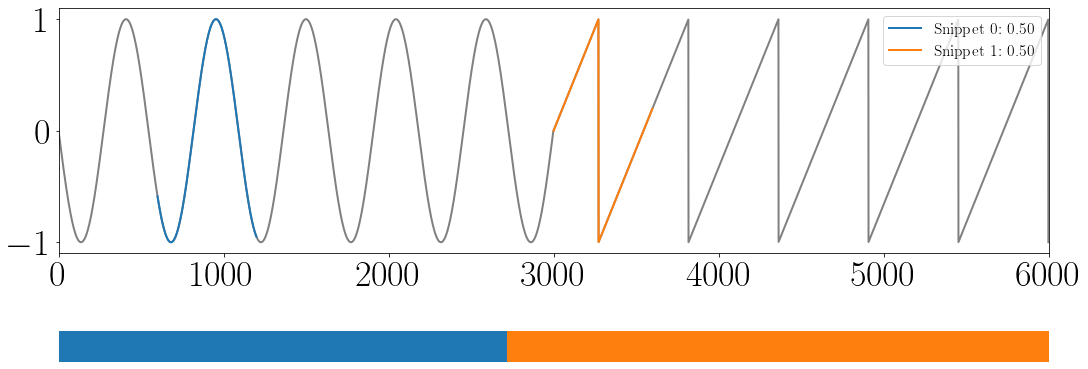

<AxesSubplot:>

In [4]:
plot_snippets(ts, snp)

### Решение

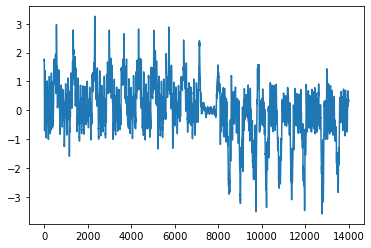

In [115]:
# Загрузка и предобработка данных
new_dataset = np.loadtxt('PAMAP.txt')
ts = new_dataset[11][95000:109000]
ts = np.nan_to_num(ts)
plt.plot(ts)

In [116]:
# Поиск сниппетов
m = 700
k = 2
snp = snippets(ts, m, k)

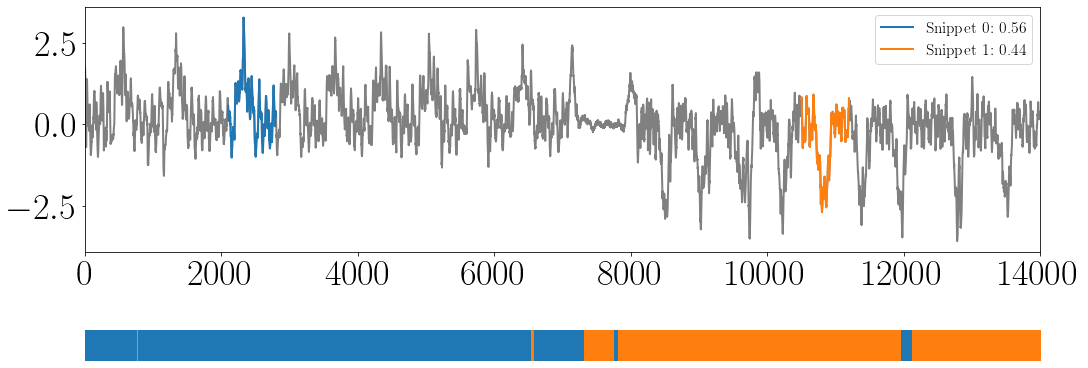

<AxesSubplot:>

In [122]:
# Визуализация результатов
plot_snippets(ts, snp)

## Задание 2. Разметка многомерного временного ряда

TODO: добавить формулировку задания

### Методические указания

TODO: добавить текст

### Решение

TODO: добавить решение

## Задание 3. Подбор оптимального значения _k_
TODO: переформулировать задание, добавить пример графика

1. Разработайте программу, которая выполняет выполняет вычисление меры _change_ для различных значений _k_ с помощью алгоритма SnippetFinder.
2. Проведите эксперименты на временных рядах из прошлого задания (взяв 1 ≤ _k_ ≤ 9).
3. Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями _ProfileArea_ и меры _change_ в зависимости от _k_.
4. Проанализируйте и изложите содержательный смысл полученных результатов.


### Методические указания

TODO: добавить текст

### Решение

In [125]:
m = 700
snps = []
for i in range(1, 10):
    snp = snippets(ts, m, i)
    snps.append(snp)

In [160]:
areas = []
for snp in snps[1:]:
    profiles = []
    for snippet in snp:
        profiles.append(snippet['distance'])
    M = np.min(np.vstack(profiles), axis=0)
    areas.append(sum(M))

changes = [0]
for i in range(1, len(areas)):
    changes.append(areas[i - 1] / areas[i] - 1)

Text(0.5, 0, 'k')

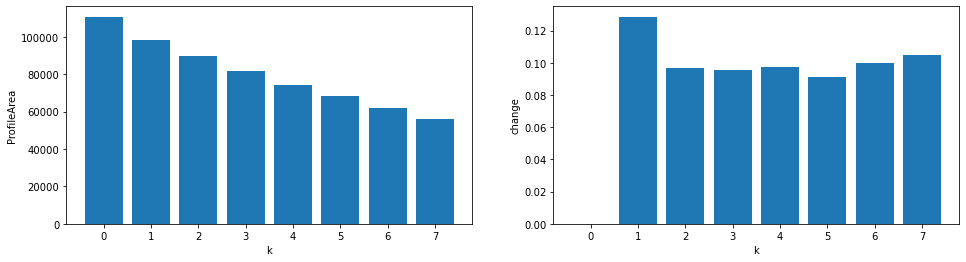

In [164]:
fig, (ax_area, ax_change) = plt.subplots(1, 2, figsize=(16, 4))
x = range(len(areas))

ax_area.bar(x, areas)
ax_area.set_ylabel('ProfileArea')
ax_area.set_xlabel('k')

ax_change.bar(x, changes)
ax_change.set_ylabel('change')
ax_change.set_xlabel('k')

## Контрольные вопросы
TODO: пересмотреть вопросы

1. Дайте определение сниппета временного ряда.
2. Объясните работу алгоритма SnippetFinder. Сравните принцип его работы с поиском мотивов ряда.
3. Назовите вычислительную и пространственную сложность алгоритма SnippetFinder.